In [1]:
"""
Е-е-е, деревья решений.
Штука которую я смогу использовать практически везде. ЫЫЫЫ
"""

"""
Скачать реальный датасет
Подготовить датасет к науськиванию модели
Тренировка и интепретация деревьев решений
Тренеровка и интепритация случайных лесов
Overfitting hyperparameter tuning & regularization
Making predictions on  single inputs
Делаем предсказание на единичном инпуте
"""

'\nСкачать реальный датасет\nПодготовить датасет к науськиванию модели\nТренировка и интепретация деревьев решений\nТренеровка и интепритация случайных лесов\nOverfitting hyperparameter tuning & regularization\nMaking predictions on  single inputs\nДелаем предсказание на единичном инпуте\n'

In [2]:
import pandas as pd
import yaml
import json
import sys
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix

df = pd.read_csv("C:/Users/User/Documents/GitHub/WSRStuff/files to parse/weatherAUS.csv")


train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')
val_targets = pd.read_parquet('val_targets.parquet')
test_targets = pd.read_parquet('test_targets.parquet')#Эти штуки


numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

#Теперьт можно спокойно использовать to_parquet, для работы с закоди
#рованными файлами.

In [3]:
encoder = OneHotEncoder(sparse_output=False,drop = None,
                        dtype = np.float64,
                        handle_unknown='ignore', sparse=False)

df.dropna(subset=['RainToday','RainTomorrow'], inplace=True)

df_2 = df[categorical_cols]
encoder.fit(df_2)
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [5]:
tree_model1 = DecisionTreeClassifier(max_depth = 3, random_state=42)

tree_model2 = DecisionTreeClassifier(max_depth = 6, random_state=42)

tree_model3 = DecisionTreeClassifier(max_depth = 9, random_state=42)

tree_model4 = DecisionTreeClassifier(max_depth = 12, random_state=42)

In [6]:
tree_model1.fit(X_train, train_targets)
tree_model2.fit(X_train, train_targets)
tree_model3.fit(X_train, train_targets)
tree_model4.fit(X_train, train_targets)


DecisionTreeClassifier(max_depth=12, random_state=42)

In [7]:
def predict_and_plot(inputs, targets, model, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets,preds)
    print("Accuracy:{:.2f}%".format(accuracy*100))
    
    cf=confusion_matrix(targets, preds, normalize = 'true')
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('prediction')
    plt.ylabel('Target')
    plt.title('{} confusion Matrix'.format(name));
    print("True {0}False {1}".format(cf[1][0], cf[1][1]))
    return preds

Accuracy:83.48%
True 0.6612632755729457False 0.3387367244270542
Accuracy:84.42%
True 0.5617663499161543False 0.43823365008384574
Accuracy:84.57%
True 0.5544997205142538False 0.4455002794857462
Accuracy:84.12%
True 0.5229178311906093False 0.4770821688093907


array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

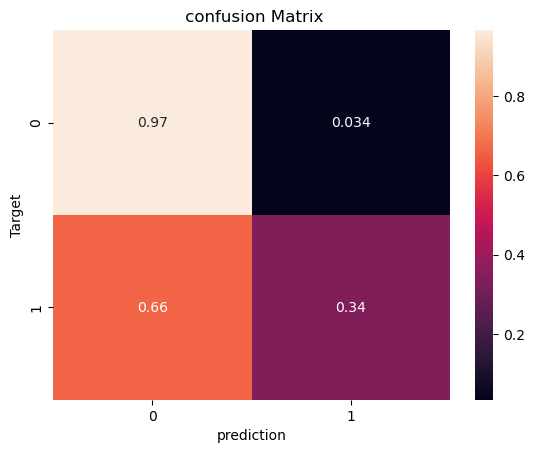

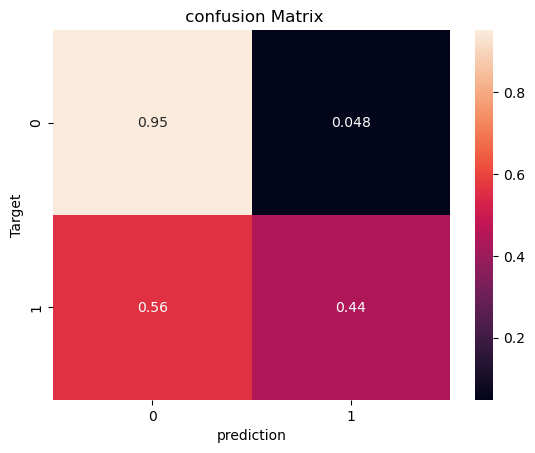

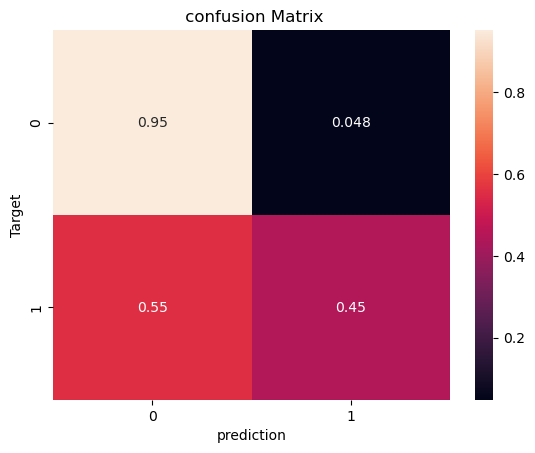

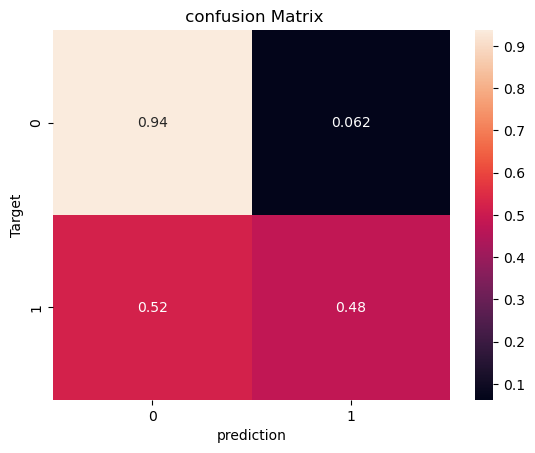

In [8]:
train_preds1 = tree_model1.predict(X_val)
train_preds2 = tree_model2.predict(X_val)
train_preds3 = tree_model3.predict(X_val)
train_preds4 = tree_model4.predict(X_val)


predict_and_plot(X_val, val_targets, tree_model1)
predict_and_plot(X_val, val_targets, tree_model2)
predict_and_plot(X_val, val_targets, tree_model3)
predict_and_plot(X_val, val_targets, tree_model4)


[Text(0.5, 0.875, 'Humidity3pm <= 0.715\ngini = 0.346\nsamples = 97988\nvalue = [76190, 21798]'),
 Text(0.25, 0.625, 'Humidity3pm <= 0.512\ngini = 0.244\nsamples = 81588\nvalue = [69975, 11613]'),
 Text(0.125, 0.375, 'Sunshine <= 0.525\ngini = 0.142\nsamples = 47657\nvalue = [43985, 3672]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'WindGustSpeed <= 0.333\ngini = 0.359\nsamples = 33931\nvalue = [25990, 7941]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Humidity3pm <= 0.825\ngini = 0.471\nsamples = 16400\nvalue = [6215, 10185]'),
 Text(0.625, 0.375, 'Rainfall <= 0.007\ngini = 0.499\nsamples = 9053\nvalue = [4772, 4281]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Rainfall <= 0.009\ngini = 0.316\nsamples = 7347\nvalue = [1443, 5904]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

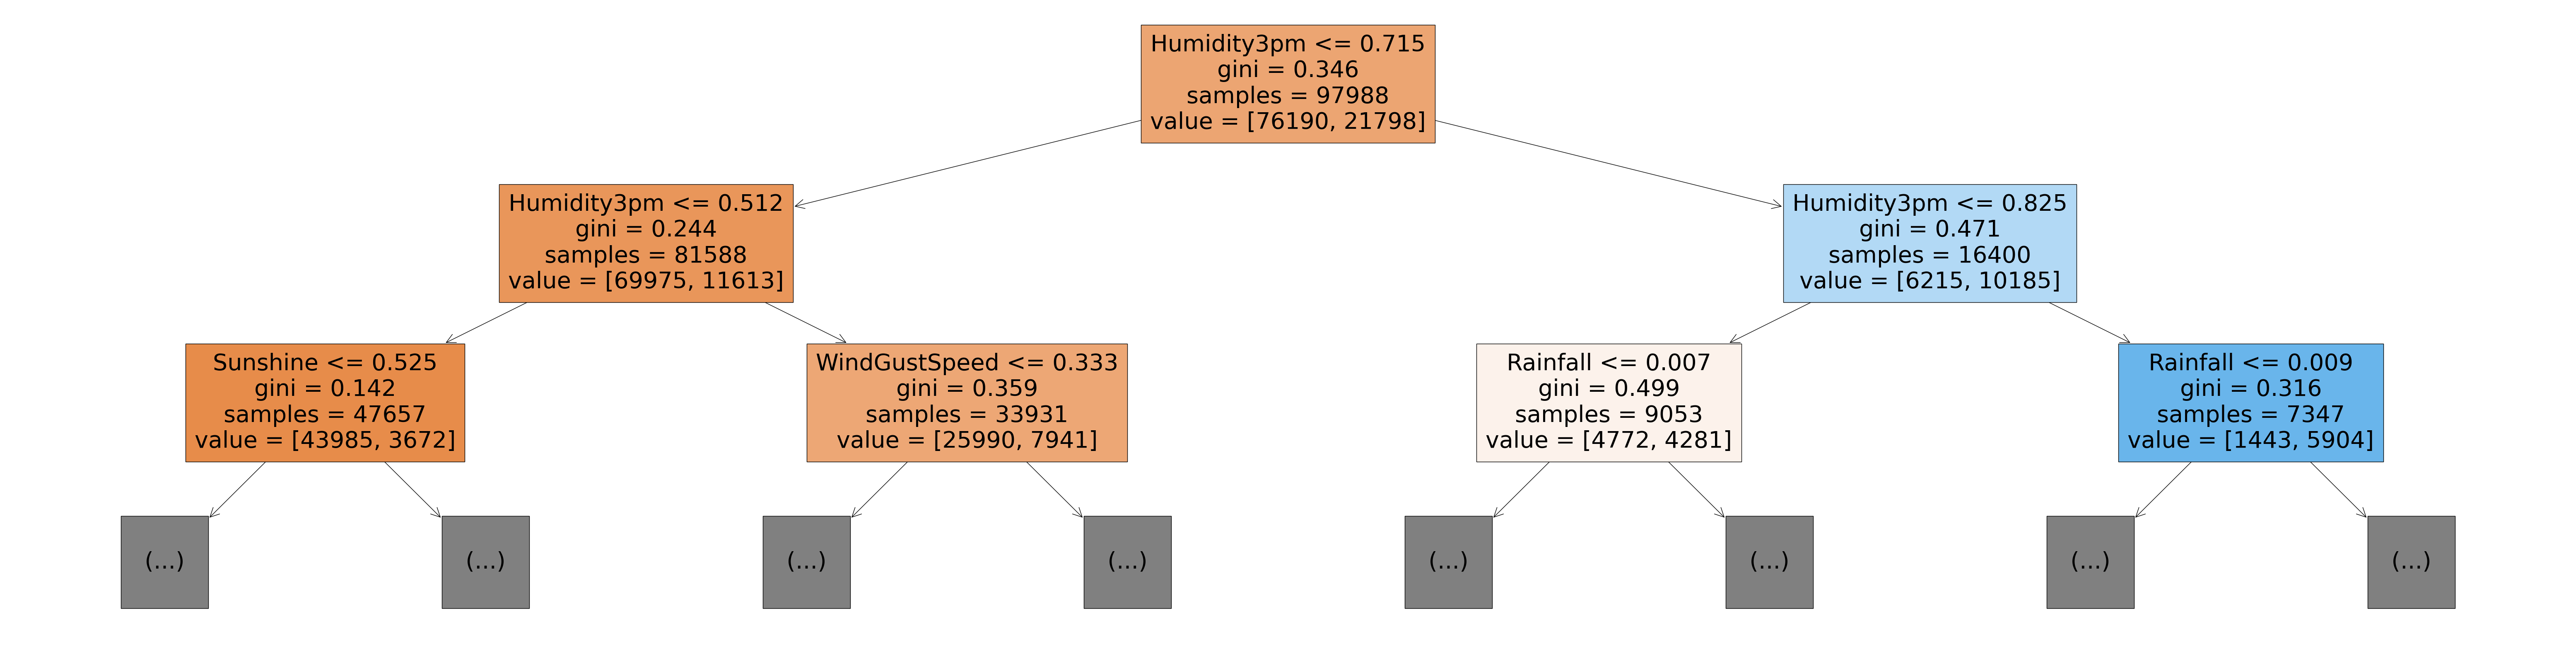

In [10]:

plt.figure(figsize =(80,20))
plot_tree(tree_model1, feature_names=list(X_train.columns),
          max_depth=2,filled=True)

<Axes: title={'center': 'Features importances'}, xlabel='importance', ylabel='feature'>

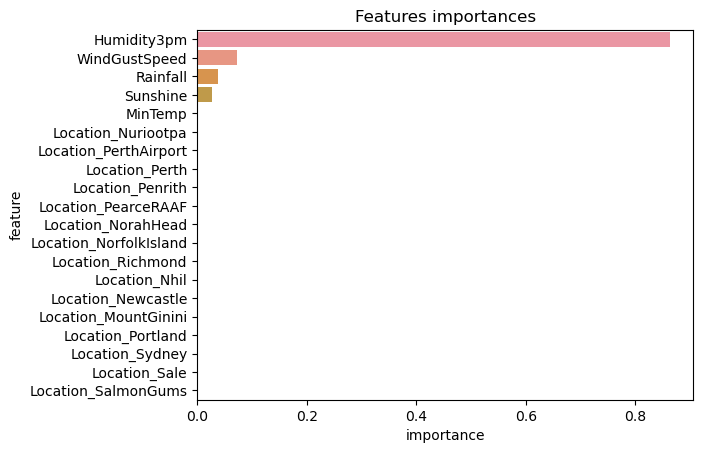

In [12]:
#А ведь при помощи этой шняги можно спокойно смотреть уже в самой модели
#наиболее важные для вычисления числа.

"""
Но и полученный результат может быть в буквальном смысле результатом 
того, что ты профигарился с данными, заполнив их всякой шляпой.
"""

tree_model1.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance':tree_model1.feature_importances_
}).sort_values('importance', ascending=False)

plt.title("Features importances")

sns.barplot(data = importance_df.head(20), x='importance', y='feature')

In [13]:
"""
Сейчас модель натренирована на тестах, она просто запомнила все тесты
да и всё, а вот на нормальных данных всё в буквальном смысле решается
монеткой.

Так что нам нужно Regularlization

(Дать по лапам модели, чтобы не лезла во все данные, заучивая их,
 огранича глубину, на которую она может полезть)
"""

'\nСейчас модель натренирована на тестах, она просто запомнила все тесты\nда и всё, а вот на нормальных данных всё в буквальном смысле решается\nмонеткой.\n\nТак что нам нужно Regularlization\n\n(Дать по лапам модели, чтобы не лезла во все данные, заучивая их,\n огранича глубину, на которую она может полезть)\n'

In [14]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_error = 1-model.score(X_train,train_targets)
    val_error = 1- model.score(X_val, val_targets)
    return{"Max depth": md, "Training Error": train_error,
           "Validation error": val_error}

{'Max depth': 1, 'Training Error': 0.18194064579336244, 'Validation error': 0.1764877991690561}
{'Max depth': 2, 'Training Error': 0.17692982814222147, 'Validation error': 0.1706945988647668}
{'Max depth': 3, 'Training Error': 0.16840837653590235, 'Validation error': 0.16519398443443145}
{'Max depth': 4, 'Training Error': 0.16215250847042495, 'Validation error': 0.16162443677219263}
{'Max depth': 5, 'Training Error': 0.15724374413193454, 'Validation error': 0.15811340628474457}
{'Max depth': 6, 'Training Error': 0.15313099563211818, 'Validation error': 0.1558312364679033}
{'Max depth': 7, 'Training Error': 0.14905906845736216, 'Validation error': 0.1546608929720873}
{'Max depth': 8, 'Training Error': 0.1448136506511002, 'Validation error': 0.15425127274855166}
{'Max depth': 9, 'Training Error': 0.1394354410744173, 'Validation error': 0.15425127274855166}
{'Max depth': 10, 'Training Error': 0.13180185328815774, 'Validation error': 0.15483644449645972}
{'Max depth': 11, 'Training Error':